In [4]:
# Required packages
using LsqFit
using PyPlot

In [5]:
# Data import
pldata = readdlm("mystery_planet.txt")
time_data = pldata[:,1]
RV_data = pldata[:,2]
err_data = pldata[:,3]

59-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.3
 1.3
 1.2
 1.1
 1.1
 1.1
 1.2
 1.2
 1.1
 1.2
 ⋮  
 1.0
 1.2
 1.3
 1.3
 1.3
 1.2
 1.3
 1.4
 1.5
 1.2
 1.1
 1.4

### Functions

In [14]:
### Define necessary functions ###

function find_period(time_data,RV_data,showplots=false)
    ### Finds the period of an RV dataset by minimizing sq residuals
    # Showplots option allows outputting useful plots instead of period
    
    # Linear period grid using 100,000 datapoints spanning 1 sec to the window width
    period = linspace(1,time_data[end]-time_data[1],100000)
    
    # Initiate other necessary arrays
    sum = Array(Real,length(period))
    phase = Array(Real,length(time_data))

    # Loop over all period guesses
    for (j,P) in enumerate(period)
        sum[j] = 0.0
  
        # Sort by phase given period
        phase = mod(time_data,P)
        
        # Combine phase & RV data
        phase_data_arr = [phase RV_data]
        
        # Sort by phase
        phase_sorted = sort(phase_data_arr,1)
        
        # Sum sq residuals
        for i in 2:length(time_data)
            sum[j] += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
        end
        
    end
    
    min_index=indmin(sum)
    min_per=period[min_index]
    
    # For output of plots describing fit
    if(showplots)
        P = min_per
        sum0 = 0.0
        
        # Sort by phase, given period
        phase = mod(time_data,P)
        
        # Combine arrays
        phase_data_arr = [phase RV_data]
        
        # Sort by phase
        phase_sorted = sortrows(phase_data_arr, by=x->x[1])
        
        # Sum sq residuals
        for i in 2:length(time_data)
            sum0 += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
        end
        
        # Plot sorted data
        plot(phase_sorted[:,1],phase_sorted[:,2],".")

        # Plot residuals
        npts = 2000
        plot(period[min_index-npts:min_index+npts],log10(sum[min_index-npts:min_index+npts]),".")

        else min_per
    end

end

# QUICKSORT FOR A traditional row-based array with multiple columns
function quicksort2D(a)
    
    lena = length(a[:,1])
    a0 = zeros(Float64,1,lena)
    
    if(lena < 2)
        return a
    end
    
    if(lena == 2)
        if(a[1,1] > a[2,1])
            a0 = a[1,:]
            a[1,:] = a[2,:]
            a[2,:] = a0
        end
        return a
    end
         
    if(lena > 2)
        pivot = a[div(lena,2)]
        i = 1
        j = lena

        while(i <= j)
            
            while(a[i,1] < pivot)
                i = i + 1
            end
            
            while(a[j,1] > pivot)
                j = j - 1
            end

            if(i <= j)
                a0 = a[i,:]
                a[i,:] = a[j,:]
                a[j,:] = a0
                i = i + 1
                j = j - 1
            end
        end

        # Recursively sort each half
        a[1:i,:] = quicksort2D(a[1:i,:])
        a[i:end,:] = quicksort2D(a[i:end,:]) 

    end
   
    return a
    
end

find_period (generic function with 2 methods)

 17.995211 seconds (180.06 M allocations: 3.414 GB, 10.05% gc time)


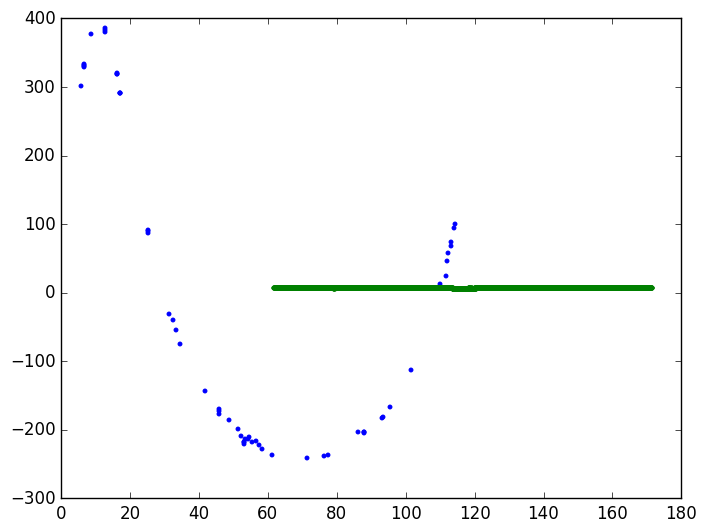

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0bd1db56a0>

In [13]:
@time find_period(time_data,RV_data,true)

In [15]:
@time find_period(time_data,RV_data,true)

LoadError: LoadError: BoundsError: attempt to access linspace(1.0,2741.36514,100000)
  at index [-1999:2001]
while loading In[15], in expression starting on line 155